# Quantum computing Stock Prediction - LSTM



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv("quantumstock1.csv")
display(dataset)

,Date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,11.125000,11.250000,10.500000,10.800000,10.800000,150500.0,IONQ
1,2021-01-05,10.850000,11.830000,10.750000,11.110000,11.110000,165300.0,IONQ
2,2021-01-06,11.500000,11.500000,11.000000,11.050000,11.050000,175600.0,IONQ
3,2021-01-07,11.500000,11.500000,11.050000,11.110000,11.110000,94200.0,IONQ
4,2021-01-08,11.650000,12.350000,11.000000,11.010000,11.010000,137500.0,IONQ
...,...,...,...,...,...,...,...,...
136513,2022-02-28,19.870001,19.980000,19.840000,19.879999,19.879999,37900.0,TOSYY
136514,2022-03-01,20.290001,20.290001,20.059999,20.059999,20.059999,28900.0,TOSYY
136515,2022-03-02,19.490000,19.570000,19.459999,19.559999,19.559999,26300.0,TOSYY
136516,2022-03-03,19.469999,19.469999,19.370001,19.420000,19.420000,41500.0,TOSYY


In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset=dataset.sort_values('Date',ascending=True).reset_index(drop=True)
#dataset['Date']=dataset['Date'].astype(str)
display(dataset)

,Date,open,high,low,close,adjclose,volume,ticker
0,1970-03-25,0.698159,0.727659,0.695701,0.722742,0.145216,1667814.0,RTX
1,1970-03-25,15.750478,16.108988,15.750478,15.917782,3.790184,1303316.0,IBM
2,1970-03-26,0.722742,0.725201,0.712909,0.712909,0.143240,447462.0,RTX
3,1970-03-26,15.917782,16.013384,15.905832,15.929732,3.793030,470700.0,IBM
4,1970-03-30,0.712909,0.722742,0.707992,0.712909,0.143240,1128826.0,RTX
...,...,...,...,...,...,...,...,...
136513,2022-03-03,29.825001,30.670000,29.504999,29.740000,29.740000,5564941.0,IFX.DE
136514,2022-03-03,161.320007,163.389999,153.160004,155.190002,155.190002,3218841.0,BIDU
136515,2022-03-03,19.469999,19.469999,19.373199,19.420000,19.420000,41541.0,TOSYY
136516,2022-03-04,3400.000000,3400.000000,3305.000000,3365.000000,3365.000000,1080700.0,4185.T


In [4]:
trainset=dataset.iloc[-1000:-100,1:2].values #Open
testset=dataset.iloc[-100:,1:2].values #Open 
real_stock_price = testset.copy()

In [5]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.0844527 ]
 [0.01859997]
 [0.00542095]
 [0.00446109]
 [0.00078016]]
900


In [6]:
x_train = []
y_train = []

In [7]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [10]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs =10, batch_size = 32)

Epoch 1/10
27/27 [==============================] - 2s 32ms/step - loss: 0.0667
Epoch 2/10
27/27 [==============================] - 1s 31ms/step - loss: 0.0638
Epoch 3/10
27/27 [==============================] - 1s 30ms/step - loss: 0.0632
Epoch 4/10
27/27 [==============================] - 1s 31ms/step - loss: 0.0633
Epoch 5/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0633
Epoch 6/10
27/27 [==============================] - 1s 34ms/step - loss: 0.0627
Epoch 7/10
27/27 [==============================] - 1s 33ms/step - loss: 0.0625
Epoch 8/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0625
Epoch 9/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0623
Epoch 10/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0623


In [11]:
inputs = dataset.iloc[len(trainset)-len(testset)-60:,1].values
print(inputs.shape)
print(inputs[0:10])

(135778,)
[14.84225559  0.65390998  0.64899302 14.615201   14.53154945  0.64161801
  0.636702   14.34034443  0.629327   14.32839394]


In the context of a LSTM model, this reshaping may be necessary if the input data has only one feature (i.e., one time series) and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). In this case, since there is only one feature, the shape does not change.

In [12]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(135778, 1)
(135778, 1)


In [13]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(135718, 60)
(135718, 60, 1)


In [14]:
predicted_price = regressor.predict(x_test)

4242/4242 [==============================] - 36s 8ms/step


In [15]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(135718, 1)


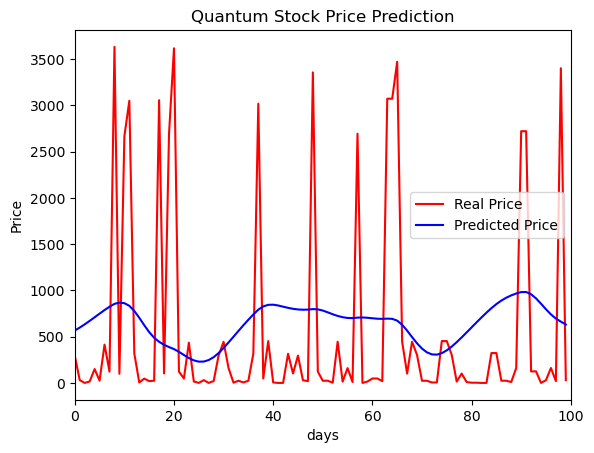

In [16]:
plt.plot(real_stock_price[-100:],color = 'red', label = 'Real Price')
plt.plot(predicted_price[-100:], color = 'blue', label = 'Predicted Price')
plt.title('Quantum Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

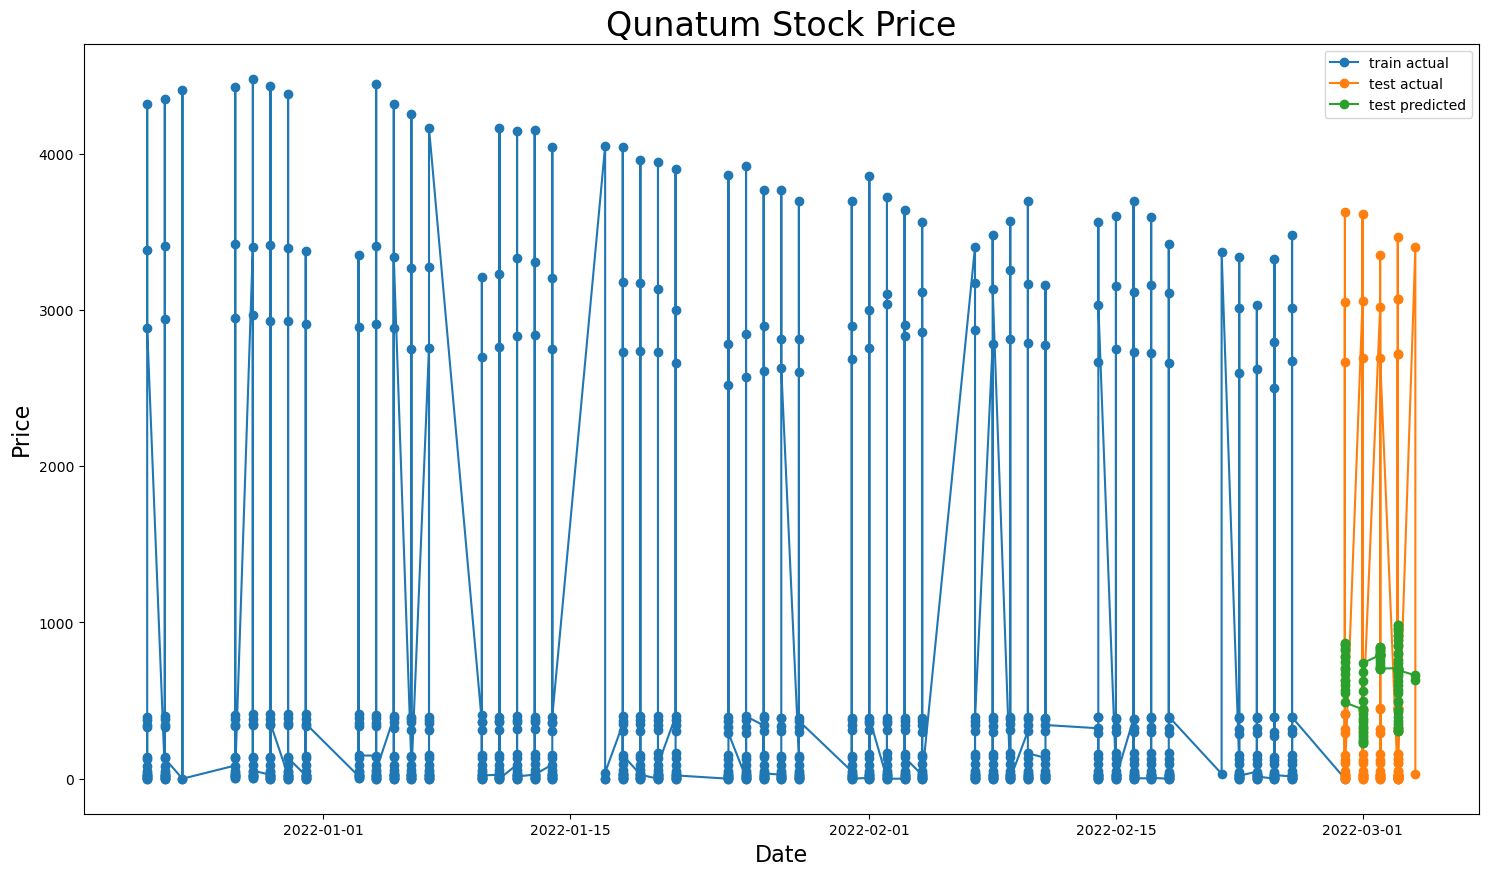

In [17]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],predicted_price[-100:],'-o',label='test predicted')
plt.title('Qunatum Stock Price',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()

In [18]:
inputs = np.array(trainset[-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 9ms/step


In [19]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


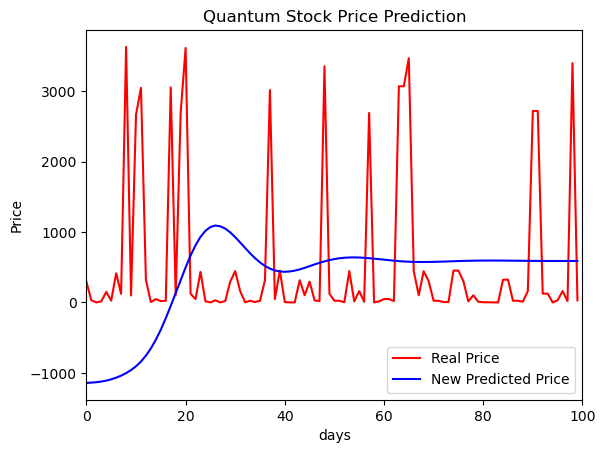

In [20]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('Quantum Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

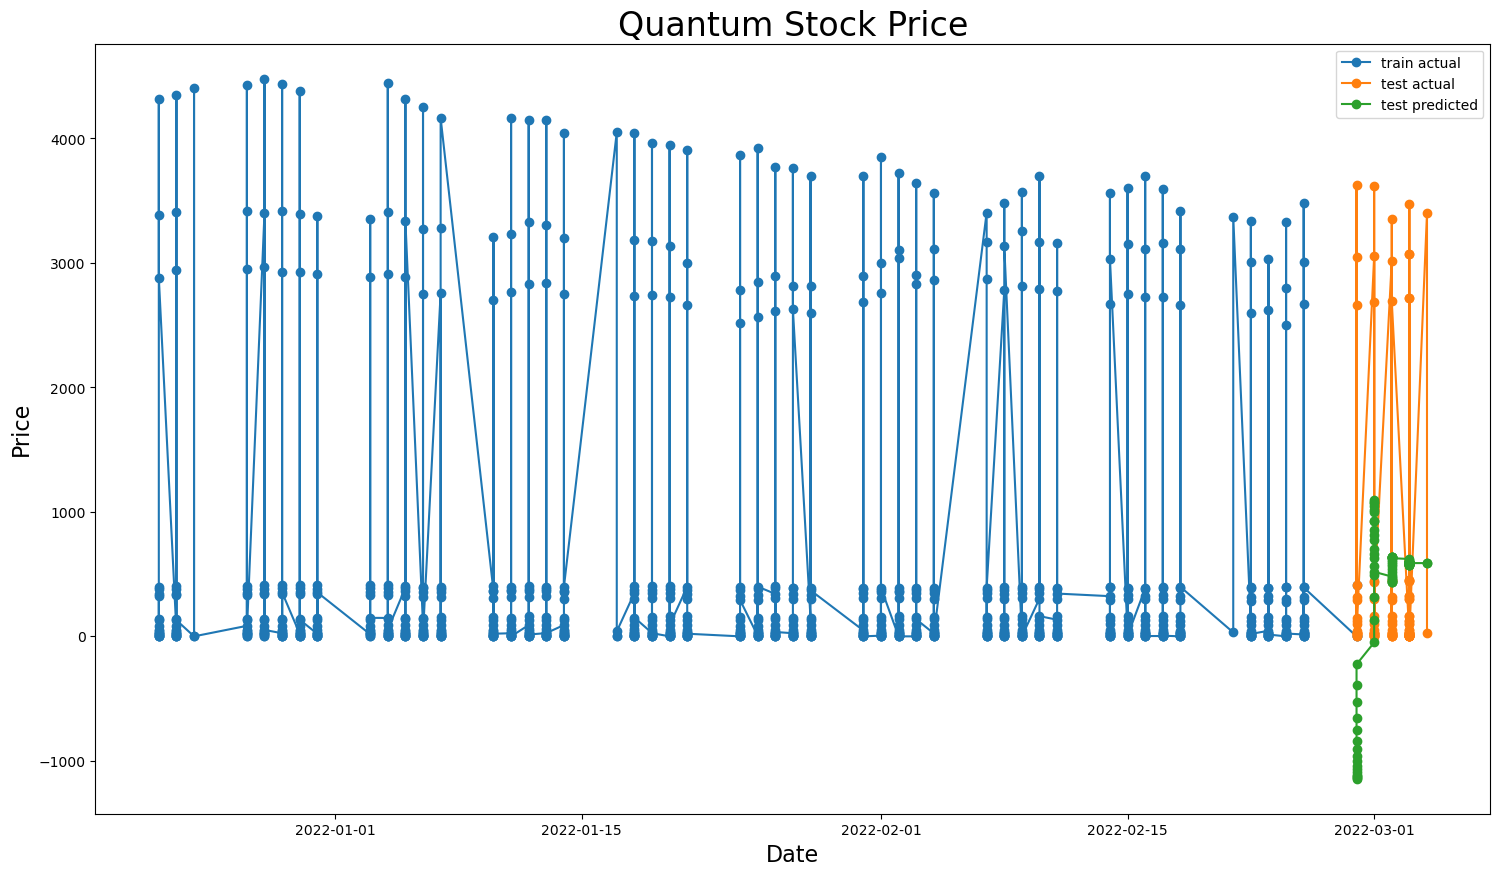

In [21]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],new_predicted_price[-100:],'-o',label='test predicted')
plt.title('Quantum Stock Price',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()